# IRIS DATA CLASSIFICATION

by 

Vinodhini Rajamanickam

Data Scientist

## Import Libraries


In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Load Data

In [2]:
data = pd.read_csv("iris.csv")

#display the data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##  Exploratory Data Analysis (EDA)

In [3]:
#check for the shape of the data
data.shape

(150, 6)

In [4]:
#print basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# print statistical information
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#checking for null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#checking for duplicate values
data.duplicated().sum()

0

Text(0.5, 1.0, 'Class Distribution')

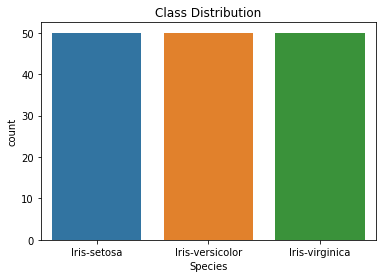

In [8]:
#Class Distribution

sns.countplot(x = "Species", data = data)
plt.title("Class Distribution")

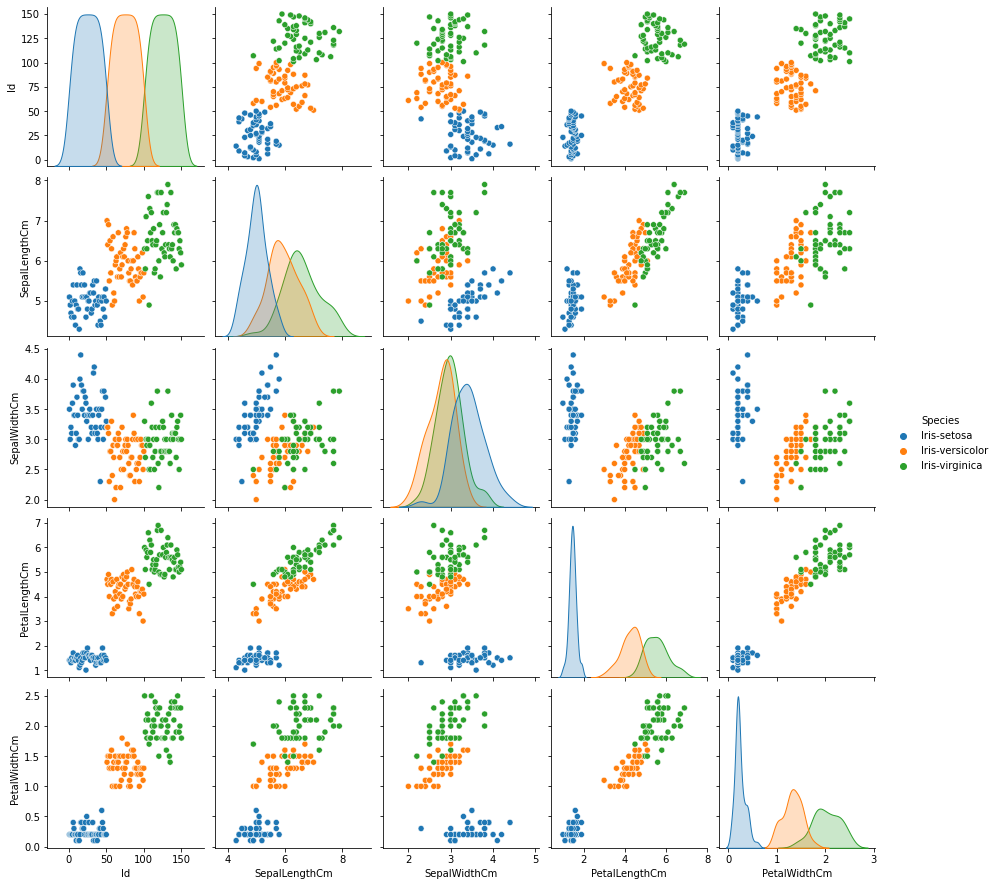

In [9]:
# Pairplot for feature visualization

sns.pairplot(data, hue = "Species")
plt.show()

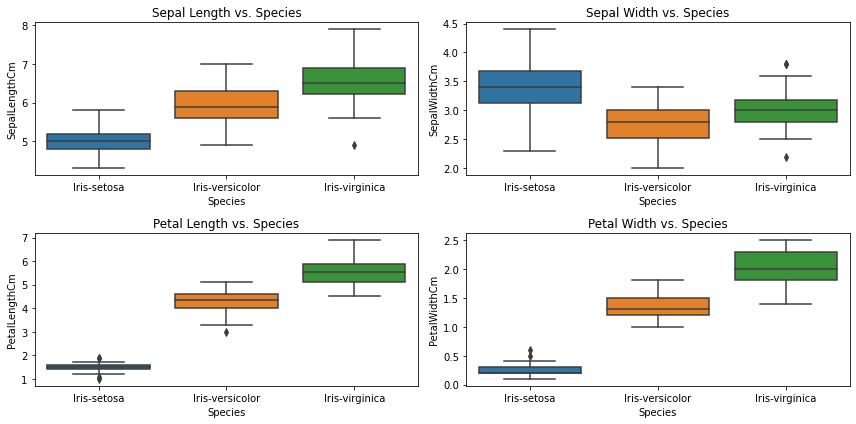

In [10]:
# Box plots for feature trends
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=data)
plt.title('Sepal Length vs. Species')

plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='SepalWidthCm', data=data)
plt.title('Sepal Width vs. Species')

plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='PetalLengthCm', data=data)
plt.title('Petal Length vs. Species')

plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='PetalWidthCm', data=data)
plt.title('Petal Width vs. Species')

plt.tight_layout()
plt.show()

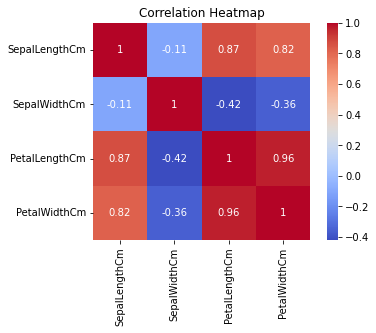

In [11]:
# Correlation heatmap
df = data.drop(["Id","Species"],axis = 1)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

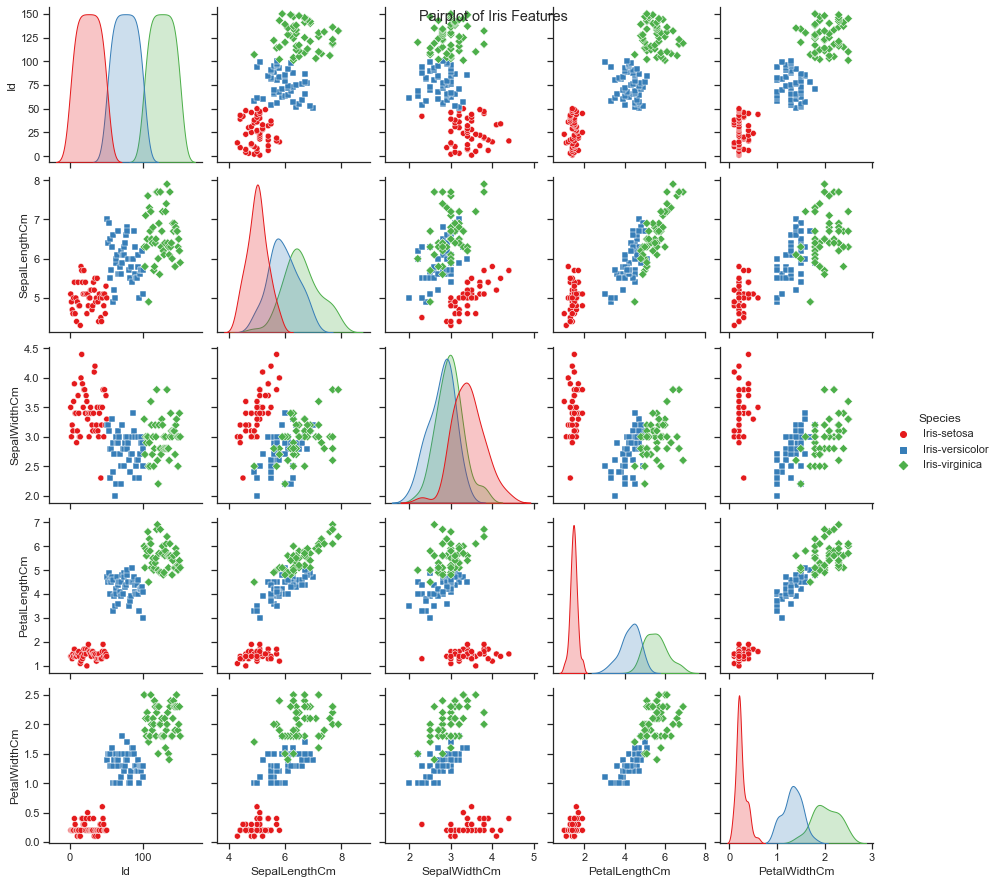

In [12]:
# Pairplot for pairwise feature relationships colored by class
sns.set(style="ticks")
sns.pairplot(data, hue="Species", markers=["o", "s", "D"], palette="Set1")
plt.suptitle("Pairplot of Iris Features")
plt.show()

## split into train and test

In [13]:
#define X and y

X = data.drop(["Id", "Species"],axis = 1)
y = data["Species"]

In [14]:
#split into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 5)

## Model Training and Evaluation

### Logistic Regression :

In [15]:
#Create a logistic Regression Model
log_model = LogisticRegression()

# Fit the model to the training data
log_model.fit(X_train, y_train)

# Make predictions on the test data
log_pred = log_model.predict(X_test)

#Evaluate the Logistic Regression model
log_accuracy = accuracy_score(y_test, log_pred)
log_report = classification_report(y_test, log_pred)

print("Logistic Regression Model:")
print(f"Accuracy: {log_accuracy:.2f}")
print("Classification Report:")
print(log_report)

Logistic Regression Model:
Accuracy: 0.97
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



C:\Users\avino\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest:

In [16]:
# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

print("Random Forest Model:")
print(f"Accuracy: {rf_accuracy:.2f}")
print("Classification Report:")
print(rf_report)


Random Forest Model:
Accuracy: 0.90
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



### Support Vector Machine (SVM):

In [17]:
# Create an SVM model
svm_model = SVC(kernel='linear', C=1, random_state=42)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
svm_pred = svm_model.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)

print("Support Vector Machine (SVM) Model:")
print(f"Accuracy: {svm_accuracy:.2f}")
print("Classification Report:")
print(svm_report)


Support Vector Machine (SVM) Model:
Accuracy: 0.93
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



### Decision Tree:

In [18]:
# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
dt_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_report = classification_report(y_test, dt_pred)

print("Decision Tree Model:")
print(f"Accuracy: {dt_accuracy:.2f}")
print("Classification Report:")
print(dt_report)


Decision Tree Model:
Accuracy: 0.93
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



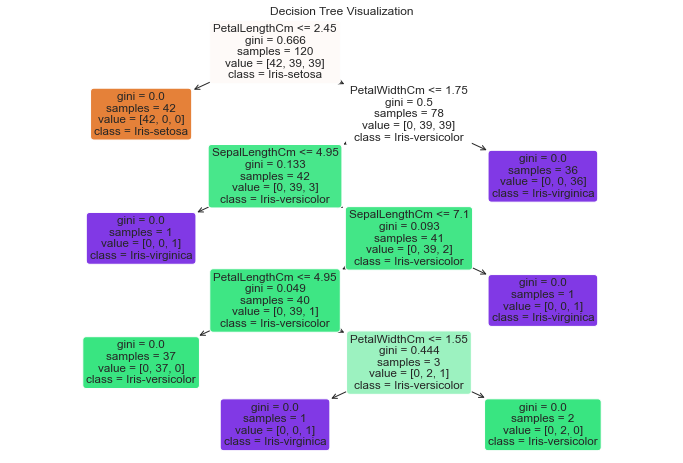

In [19]:
# Visualize the Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=data["Species"].unique(), filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

### k-Nearest Neighbors (KNN):

In [20]:
# Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
knn_pred = knn_model.predict(X_test)

# Evaluate the KNN model
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)

print("K-Nearest Neighbors (KNN) Model:")
print(f"Accuracy: {knn_accuracy:.2f}")
print("Classification Report:")
print(knn_report)


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.93
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



## Final Model

In [27]:
#Create a logistic Regression Model
final_model = LogisticRegression()

# Fit the model to the training data
final_model.fit(X_train, y_train)

# Make predictions on the test data
final_pred = final_model.predict(X_test)

#Evaluate the Logistic Regression model
final_accuracy = accuracy_score(y_test, final_pred)
final_report = classification_report(y_test, final_pred)

print("Logistic Regression Model:")
print(f"Accuracy: {final_accuracy:.2f}")
print("Classification Report:")
print(final_report)

Logistic Regression Model:
Accuracy: 0.97
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



C:\Users\avino\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
